In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/cardio_train.csv', sep=';'))

In [ ]:
df['age'] = df['age']/365
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df['age'].mean()

np.float64(53.33935839530333)

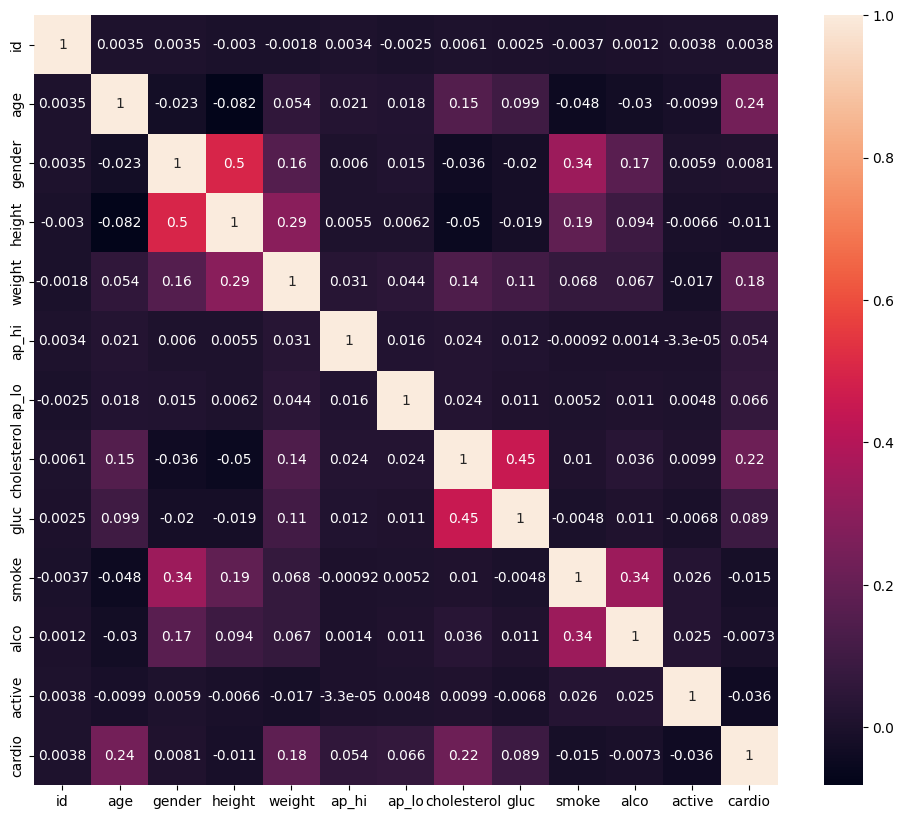

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Task
Analyze the relationship between the target variable 'cardio' and all other variables in the dataset by generating appropriate plots based on variable types.

## Identify variable types

### Subtask:
Determine which variables are categorical and which are numerical.


**Reasoning**:
Iterate through the columns, check data types, and classify columns as categorical or numerical based on data type and unique value counts.



In [ ]:
categorical_cols = []
numerical_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    elif df[col].dtype in ['int64', 'float64']:
        # For numerical columns, check the number of unique values to potentially identify categorical variables stored as numbers
        if df[col].nunique() < 10 and col != 'id': # Assuming less than 10 unique values might indicate a categorical variable, exclude 'id'
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)



Categorical columns: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
Numerical columns: ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']


## Visualize relationships with categorical variables

### Subtask:
Create count plots to show the distribution of 'cardio' for each categorical variable.


**Reasoning**:
To analyze the relationship between categorical variables and the target variable 'cardio', I will create count plots for each categorical feature, using 'cardio' as the hue to visualize the distribution of cardiovascular disease presence for each category. This directly addresses the subtask's instructions.



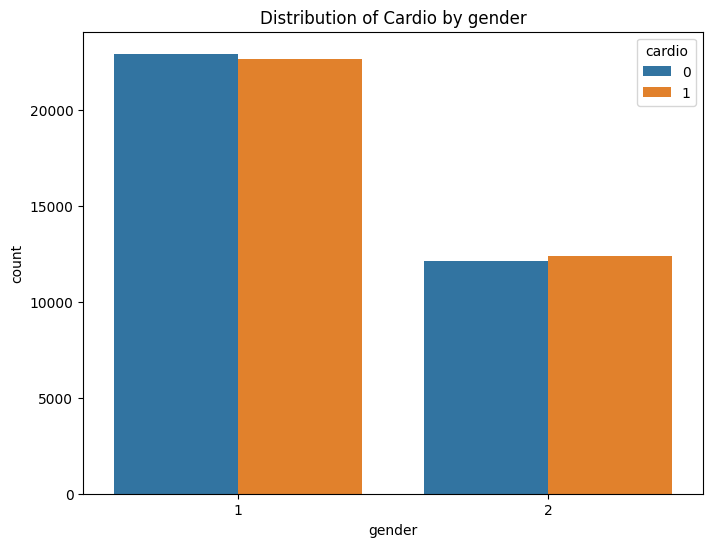

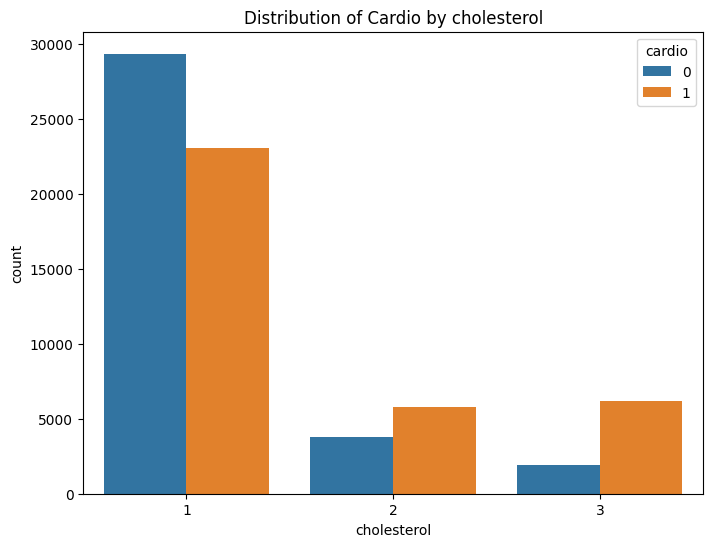

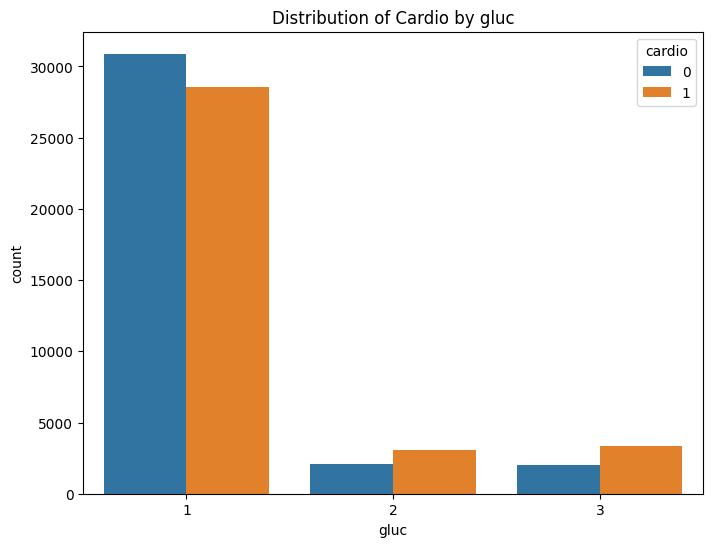

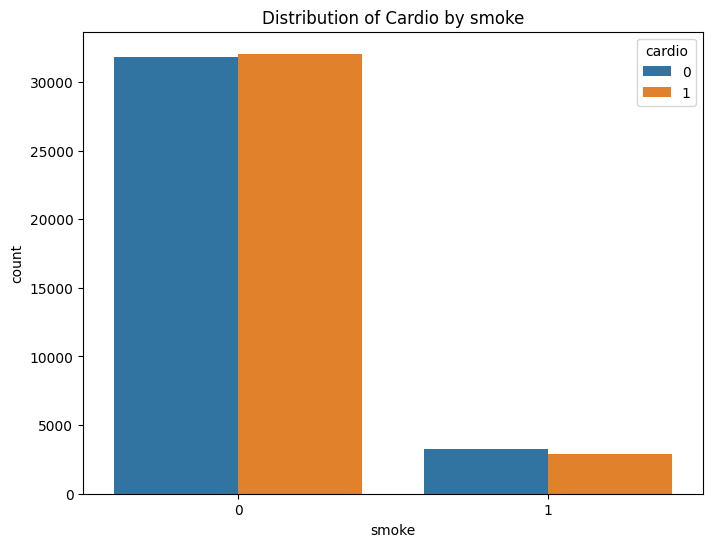

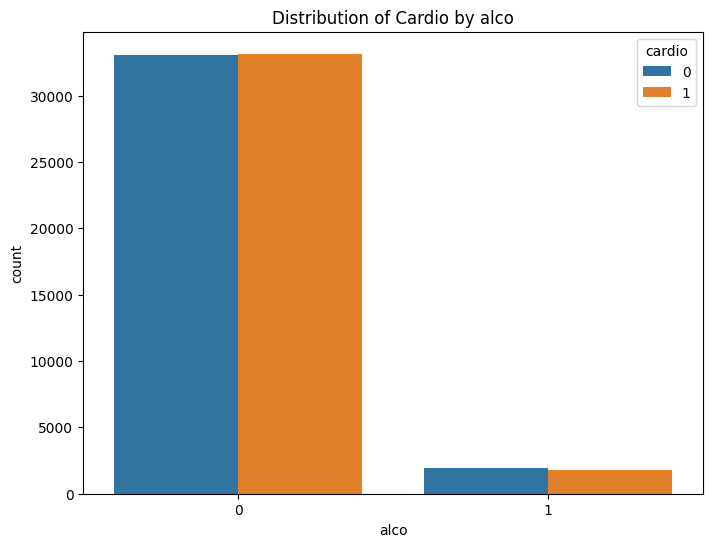

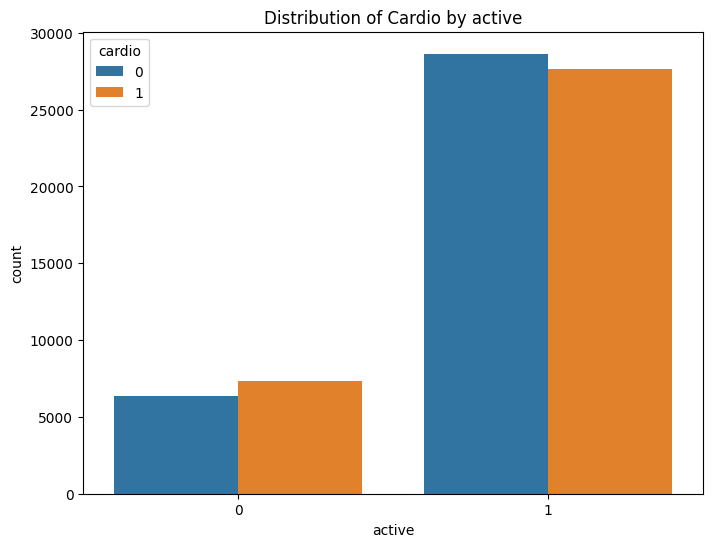

In [ ]:
for col in categorical_cols:
    if col != 'cardio':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, hue='cardio', data=df)
        plt.title(f'Distribution of Cardio by {col}')
        plt.show()

## Visualize relationships with numerical variables

### Subtask:
Create distribution plots, box plots, or violin plots to compare the distribution of numerical variables for each 'cardio' value (0 or 1).


**Reasoning**:
Iterate through the numerical columns and create distribution plots to compare their distributions for the two values of 'cardio'.



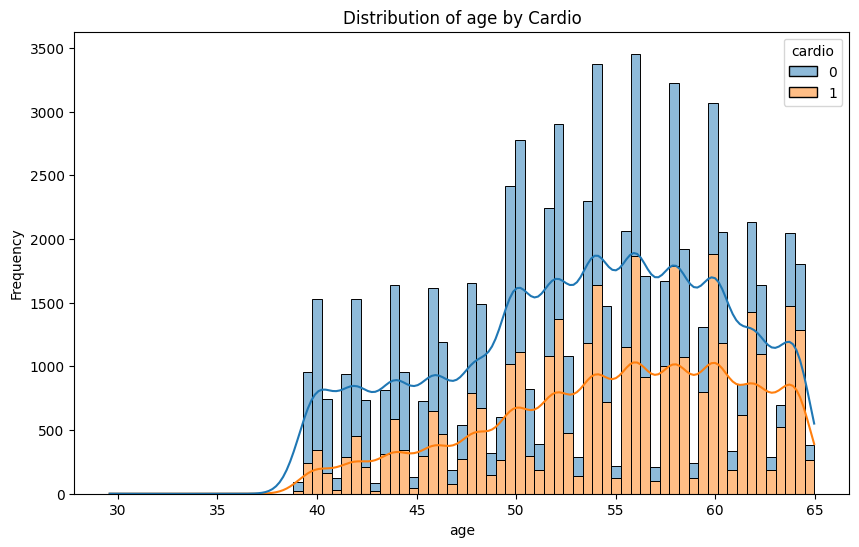

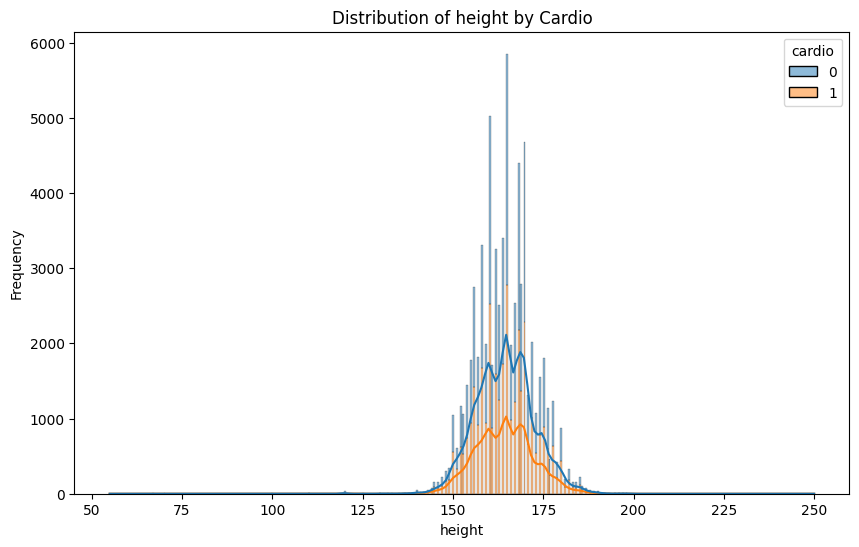

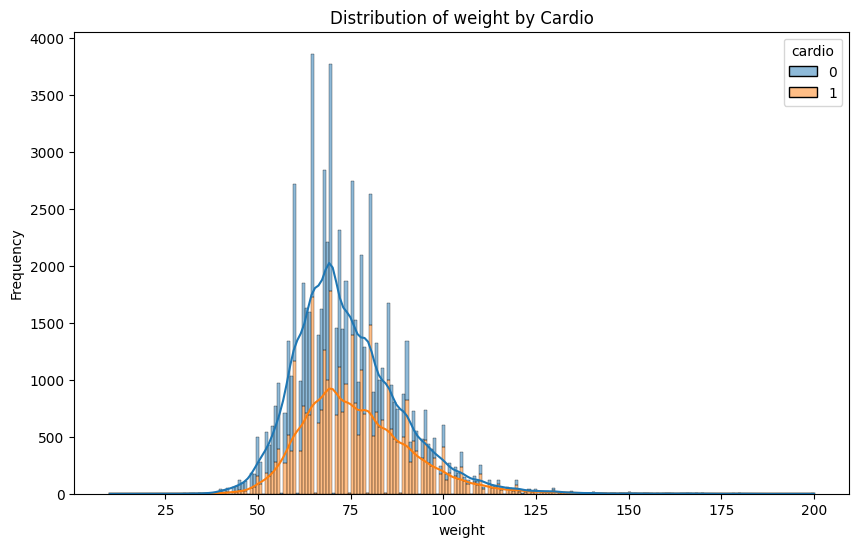

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


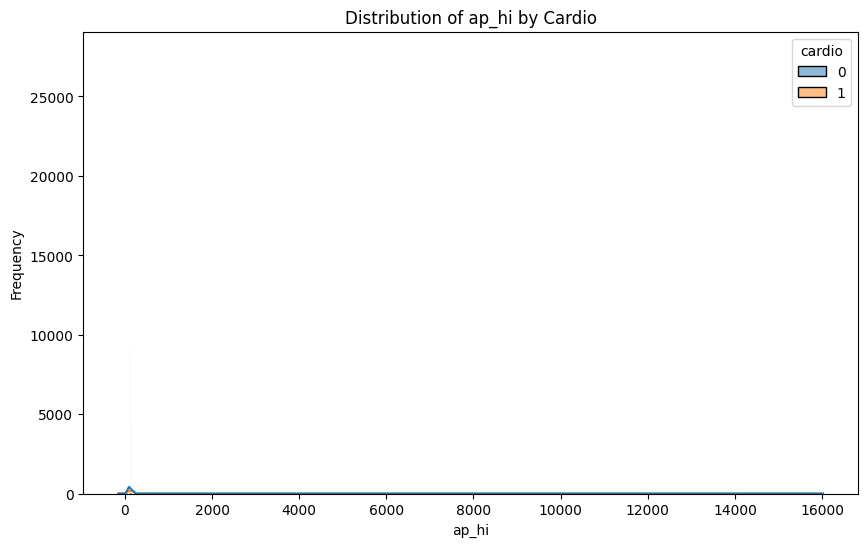

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


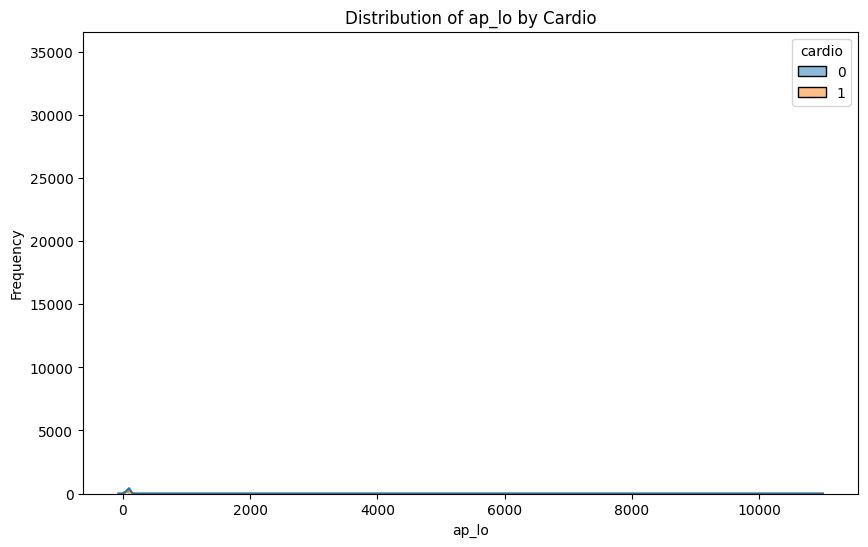

In [ ]:
for col in numerical_cols:
    if col != 'id': # Exclude 'id' as it's not a relevant numerical feature for this analysis
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, hue='cardio', kde=True, multiple="stack")
        plt.title(f'Distribution of {col} by Cardio')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()